# Assignment 5: Special Preliminary Assignment for Final Project

### Choose a preliminary dataset: 
Dow Jones Index Data Set 

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

###  Import your data in the notebook

In [6]:
import pandas as pd
df = pd.read_csv('dow.data')

In [7]:
df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,-2.377620,54,0.594786


### Explore the data with data visualizations

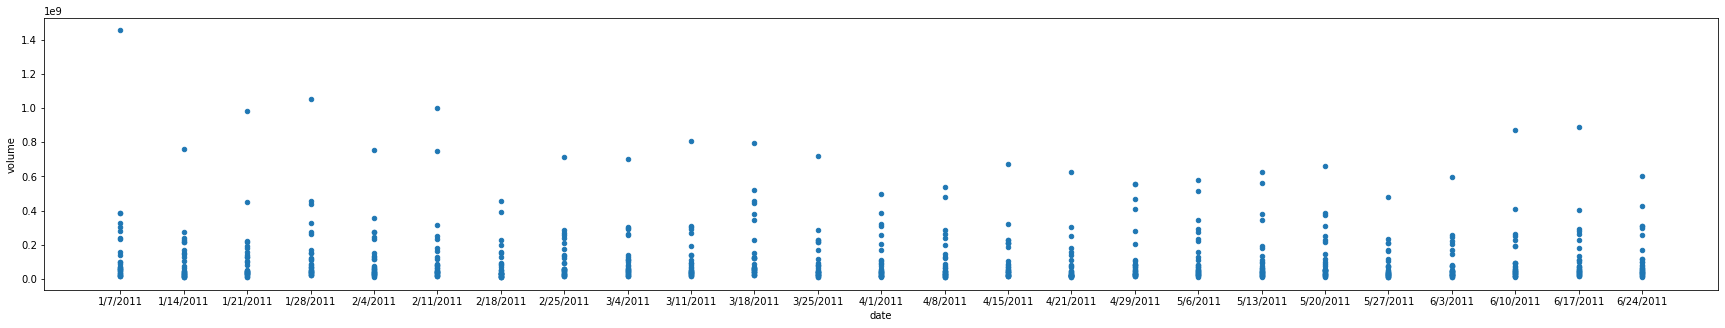

In [8]:
df.plot.scatter(x='date', y='volume', figsize=(30, 5));

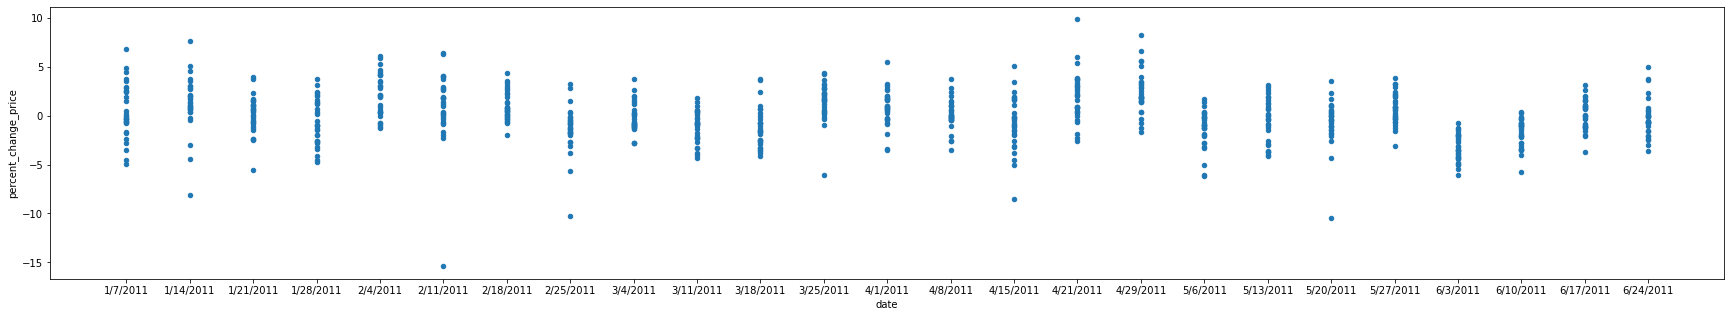

In [9]:
df.plot.scatter(x='date', y='percent_change_price', figsize=(30, 5));

###  Use the ML workflow to do the "Default Task" noted on the dataset webpage (Classification/Clustering)

Split your x and y data into training and test sets

Choose one ML model

Use cross-validation with your training data to select optimal hyperparameters as appropriate

Train your model using your training data

Evaluate your model

In this case, I chose to do classification

In [36]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [37]:
kmeans = KMeans(n_clusters=9)

In [38]:
ourcolors = ['red','blue','black','green','yellow','magenta','orange','brown','grey','aqua']

In [39]:
#get the price movement 
x = df.percent_change_next_weeks_price
x = x.values.reshape(-1,1)
print(x.shape)

#get the days to the next dividend
y = df.days_to_next_dividend
y = y.values.reshape(-1,1)
print (y.shape)

(750, 1)
(750, 1)


In [40]:
kmeans.fit(x)

KMeans(n_clusters=9)

In [41]:
kmeans.labels_

array([5, 7, 1, 2, 8, 3, 0, 0, 7, 8, 6, 1, 6, 3, 5, 3, 2, 0, 7, 3, 8, 8,
       1, 3, 8, 8, 7, 6, 8, 8, 3, 3, 3, 7, 6, 8, 2, 5, 5, 6, 1, 3, 0, 0,
       1, 0, 5, 3, 8, 0, 6, 6, 6, 1, 7, 8, 7, 1, 1, 6, 1, 7, 8, 2, 4, 3,
       3, 0, 0, 7, 3, 0, 1, 8, 3, 6, 3, 6, 6, 1, 5, 6, 6, 1, 6, 7, 6, 6,
       6, 6, 0, 3, 0, 3, 8, 1, 8, 1, 0, 6, 2, 8, 8, 8, 0, 7, 6, 3, 8, 6,
       1, 1, 6, 3, 3, 7, 3, 7, 8, 6, 2, 1, 8, 3, 1, 6, 5, 8, 3, 7, 6, 8,
       6, 1, 7, 6, 1, 8, 4, 0, 7, 3, 1, 7, 1, 6, 1, 6, 3, 8, 3, 3, 8, 7,
       6, 1, 1, 0, 1, 8, 3, 1, 3, 3, 7, 7, 1, 7, 8, 8, 5, 8, 3, 8, 0, 1,
       7, 0, 8, 8, 6, 8, 0, 8, 6, 6, 0, 7, 8, 8, 3, 8, 1, 3, 7, 1, 0, 8,
       6, 3, 8, 0, 1, 8, 8, 3, 0, 8, 1, 1, 1, 1, 3, 7, 6, 6, 3, 8, 0, 8,
       6, 3, 0, 1, 8, 5, 1, 8, 6, 1, 0, 8, 6, 1, 7, 8, 0, 7, 1, 8, 4, 3,
       7, 0, 8, 3, 0, 6, 3, 0, 1, 1, 8, 3, 0, 3, 0, 3, 3, 7, 0, 7, 1, 3,
       8, 3, 0, 2, 0, 1, 3, 6, 3, 6, 8, 3, 1, 8, 7, 0, 8, 3, 0, 0, 3, 3,
       3, 1, 3, 3, 7, 1, 1, 8, 3, 0, 1, 0, 8, 2, 6,

In [42]:
x[[0]]

array([[-4.42849]])

In [43]:
kmeans.predict(x[[0]])

array([5], dtype=int32)

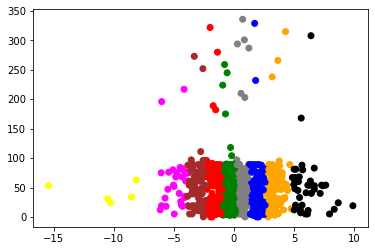

In [44]:
plt.scatter(x,
            y,
            color=[ourcolors[i] for i in kmeans.labels_])

In [45]:
print(kmeans.inertia_)

196.27100496191187


The lower the inertia the better. In this case, the inertia is very high. However, I noticed that the inertia would decrease when we increased the number of clusters.